In [1]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже смутно знакомый вам пакет для картинок :3
import seaborn as sns             # ещё один пакет для картинок 
from sklearn import metrics  # подгружаем метрики

%matplotlib inline

In [2]:
df = pd.read_csv("Asadullin_Amir_bike_sharing.csv",sep=',',index_col='instant')
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
##Избавляюсь от ненужных переменных:
df.drop(['casual'], axis=1, inplace=True)
df.drop(['registered'], axis=1, inplace=True)
df.drop(['yr'], axis=1, inplace=True)
df.drop(['dteday'], axis=1, inplace=True)#Так как параметры дня уже есть среди переменных, а следовательно название этого дня
#(дата) нам не нужно.
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
df.isnull().sum()
##Пропусков нет -супер

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

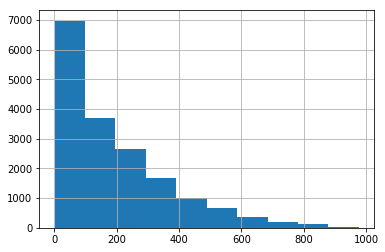

In [5]:
##Посмотрим на распределение количества велосипедов:
df.cnt.hist()

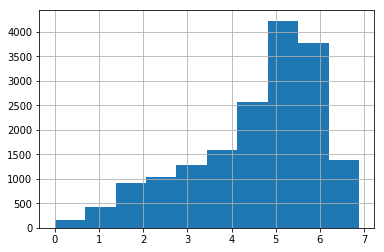

In [6]:
##Так как хвост слишком длинный применим логорифмирование:
df['cnt'] = np.log(df['cnt'])
df.cnt.hist()

In [7]:
## Начнем предобработку пременных

In [8]:
## Преобразуем их в соответствующий тип:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 12 columns):
season        17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null float64
dtypes: float64(5), int64(7)
memory usage: 1.7 MB


In [9]:
df['season'] = df['season'].astype(str)
df['mnth'] = df['mnth'].astype(str)
df['hr'] = df['hr'].astype(str)
df['holiday'] = df['holiday'].astype(str)
df['weekday'] = df['weekday'].astype(str)
df['workingday'] = df['workingday'].astype(str)
df['weathersit'] = df['weathersit'].astype(str)

In [10]:
##После преобразования переменные имеют следующий вид:
target_var = 'cnt'  # переменная, которую мы будем прогнозировать
categor_var = ['season','mnth', 'hr','holiday','weekday','workingday','weathersit']     # категориальные  
contin_var = ['temp','atemp','hum','windspeed'] # непрерывные 
#Можно заметить, что текстовых нет (Вот Везуха!)

In [11]:
#Начнем обработку классовых переменных:
df_categor = df[categor_var]
df_categor.head() # классовые переменные 

,season,mnth,hr,holiday,weekday,workingday,weathersit
instant,,,,,,,
1,1,1,0,0,6,0,1
2,1,1,1,0,6,0,1
3,1,1,2,0,6,0,1
4,1,1,3,0,6,0,1
5,1,1,4,0,6,0,1


In [12]:
len(df['season'].unique()), len(df['mnth'].unique()),len(df['hr'].unique()),len(df['holiday'].unique()),len(df['weekday'].unique()),len(df['workingday'].unique()), len(df['weathersit'].unique())

(4, 12, 24, 2, 7, 2, 4)

In [13]:
#Так как наблюдений у нас 17379, то можно создать 1737 столбцов, поэтому
# мы можем использовать One Hot Encoding даже если количество вариантов в 
#классовой переменной 24
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 12 columns):
season        17379 non-null object
mnth          17379 non-null object
hr            17379 non-null object
holiday       17379 non-null object
weekday       17379 non-null object
workingday    17379 non-null object
weathersit    17379 non-null object
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null float64
dtypes: float64(5), object(7)
memory usage: 1.7+ MB


In [14]:
df_categor = pd.get_dummies(df[categor_var], dummy_na=False, drop_first=True)
df_categor.head()
##Так как пропусков нет можно избавиться от столбца фиксирующего пропуски.

,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
#Заменяем исходные данные Dummies:
df = pd.concat([df,df_categor], axis=1)
df.drop(categor_var, axis=1, inplace=True)
df.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_10,mnth_11,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,0.24,0.2879,0.81,0.0,2.772589,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,3.688879,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.22,0.2727,0.80,0.0,3.465736,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,2.564949,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.24,0.2879,0.75,0.0,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# Теперь делим данные на тренировочные и тестовые

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

price_train = df_train['cnt']
price_test = df_test['cnt']

X_train = df_train.drop(['cnt'], axis=1)
X_test = df_test.drop(['cnt'], axis=1)

In [17]:
# Посмотрим на их размеры
df_train.shape, df_train.shape

((12165, 53), (12165, 53))

In [20]:
# объявим скалировщик!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[['temp','atemp','hum','windspeed']])
#Здесь мы учим на трэйне скалировщик скалировать, 
# чтобы стохастический градиентый спуск быстрее обучил вашу регрессию.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
# Применяем скалировщик к трэйну.
df_train_scale = scaler.transform(df_train[['temp','atemp','hum','windspeed']])
# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['temp','atemp','hum','windspeed']])

In [22]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_10,mnth_11,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1730,0.50,0.4848,0.42,0.1940,5.746203,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7248,0.52,0.5000,0.52,0.1642,5.023881,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
3325,0.66,0.6212,0.74,0.2985,4.795791,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9518,0.32,0.3182,0.61,0.1642,5.010635,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1857,0.34,0.3182,0.76,0.2239,0.693147,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [23]:
# Вытаскиваем количество велосипедов для удобства 

y_train = df_train.cnt 
y_test = df_test.cnt 

X_train = df_train.drop('cnt', axis=1).get_values()
X_test = df_test.drop('cnt', axis=1).get_values()

In [24]:
# Константный прогноз

In [25]:
# посчитаем среднее 
y_mean = np.mean(y_train)                      
# спрогнозируем им количество всех велосипедов в тестовой выборке
y_pred_naive = np.ones(len(y_test)) * y_mean  
y_pred_naive[:5]

array([4.54209684, 4.54209684, 4.54209684, 4.54209684, 4.54209684])

In [26]:
# Перейдём к метрикам. Узнаем, насколько этот прогноз хорош.

In [27]:
# Средняя абсолютная ошибка.

metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

141.21630595245225

In [28]:
# Средняя квадратичная ошибка.
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

41076.85380921252

In [29]:
def mean_absolute_percentage_error(y_test, y_pred):
    epsilon=1e-9
    y_test, y_pred = np.array(y_test)+epsilon, np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(y_test, y_pred_naive)

4529900988.580568

In [30]:
# Коэффициент детерминации.
metrics.r2_score(y_test, y_pred_naive)

-0.00018127776267262696

In [31]:
# А теперь для удобства закинем все метрики в одну общую функцию

In [32]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [33]:
# Регресия.

In [34]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

In [35]:
# Посмотрим на качество прогнозов. Мы стали ошибаться меньше, чем раньше.
print_metrics(y_test,y_pred_regr)

MAE: 71.9165416089827
RMSE: 111.9402133483179
R2: 0.7946311612604919
MAPE: 1620617090.429045


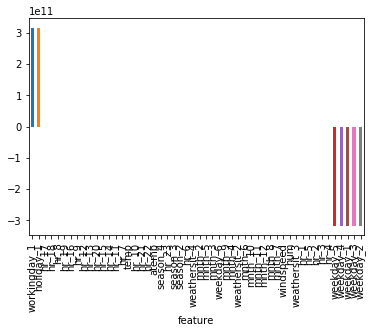

In [36]:
# Посмотрим на то, какие признаки вносят наибольший вклад.

featureImportance = pd.DataFrame({"feature": df.drop('cnt',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [37]:
# Случайный лес.

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Объявили лес из 100 деревьев
rf = RandomForestRegressor(n_estimators=100)

# Обучили лес 
rf.fit(X_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(X_test)

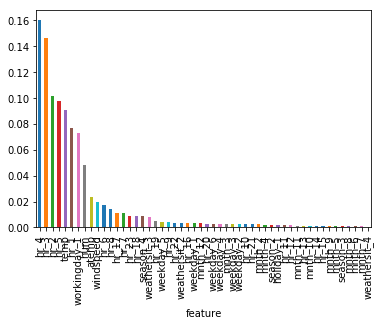

In [39]:
# Посмотрим на важность факторов.

featureImportance = pd.DataFrame({"feature": df.drop('cnt',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [40]:
rf = RandomForestRegressor()
estimators = ('n_estimator')

In [41]:
#Сравниваем модели между собой.

In [42]:
print_metrics(y_test,y_pred_naive)

MAE: 141.21630595245225
RMSE: 202.67425541793048
R2: -0.00018127776267262696
MAPE: 4529900988.580568


In [43]:
print_metrics(y_test,y_pred_regr)

MAE: 71.9165416089827
RMSE: 111.9402133483179
R2: 0.7946311612604919
MAPE: 1620617090.429045


In [44]:
print_metrics(y_test,y_pred_forest)

MAE: 49.49980288286034
RMSE: 76.91593914536858
R2: 0.8887760048586033
MAPE: 1174447531.560028


In [ ]:
# Случайные лес - более точный.